# Extracting Text from Images in Python

<!-- <img src="https://media.arxiv-vanity.com/render-output/6158804/images/fig_2_no_trademarks.png" alt="text to images" width="600" height="600"> -->


In [2]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

# Plot Example Images

In [155]:
annot = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/annot.parquet')
imgs = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/img.parquet')
img_fns = glob('../input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/*')

In [156]:
n = 2
annot.head(n)

,id,image_id,bbox,utf8_string,points,area
0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance,"[525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...",6707.90
1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport,"[535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...",3483.69


In [157]:
imgs.head(n)

,id,width,height,set,file_name
0,a4ea732cd3d5948a,840,1024,train,train/a4ea732cd3d5948a.jpg
1,4bf43a7b2a898044,1024,683,train,train/4bf43a7b2a898044.jpg


In [158]:
img_fns[:n]

['../input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/f644219f560e3778.jpg',
 '../input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/c613956f36cbd5cd.jpg']

In [159]:
def plot_img(img_index):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(plt.imread(img_fns[img_index]))
    ax.axis('off')
    plt.show()

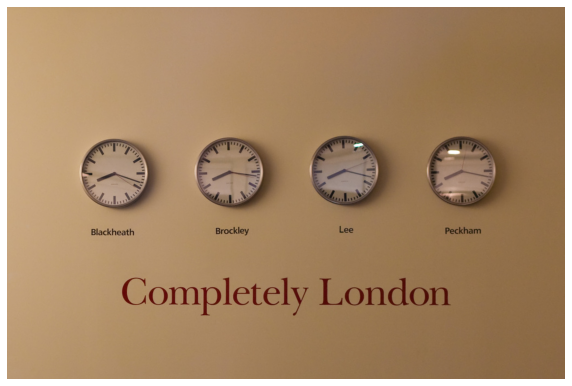

In [160]:
# Plot base_example:
# in this case image 44

img_index=44
plot_img(img_index)

## Method 1: easyocr on base_example -->

In [161]:
import easyocr

reader = easyocr.Reader(['en'], gpu = True)

In [162]:
img_filename=img_fns[img_index]

reader_base_example = easyocr.Reader(['en'], gpu = True)
results_base_easy = reader_base_example.readtext(img_filename)
base_easy_df = pd.DataFrame(results_base_easy, columns=['bbox','text','conf'])
base_easy_df = base_easy_df[['text','bbox']]
base_easy_df

,text,bbox
0,Blackheath,"[[151, 405], [237, 405], [237, 423], [151, 423]]"
1,Brockley,"[[377, 398], [448, 398], [448, 424], [377, 424]]"
2,Lee,"[[607, 399], [639, 399], [639, 419], [607, 419]]"
3,Peckham,"[[801, 401], [873, 401], [873, 421], [801, 421]]"
4,Completely London,"[[203, 487], [823, 487], [823, 579], [203, 579]]"


## Method 2: keras_ocr on base_example

In [163]:
!pip install keras-ocr -q
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [166]:
results_base_keras = pipeline.recognize([img_filename])
base_keras_df = pd.DataFrame(results_base_keras[0], columns=['bbox', 'text'])
base_keras_df

,bbox,text
0,lee,"[[609.0, 403.0], [637.0, 403.0], [637.0, 418.0..."
1,brockley,"[[382.22305, 403.2009], [446.43576, 405.67062]..."
2,peckham,"[[803.0, 405.0], [871.0, 405.0], [871.0, 420.0..."
3,blackheath,"[[154.0, 408.0], [235.0, 408.0], [235.0, 423.0..."
4,completely,"[[211.08336, 496.8306], [554.2183, 498.4046], ..."
5,london,"[[572.0, 499.0], [814.0, 499.0], [814.0, 554.0..."


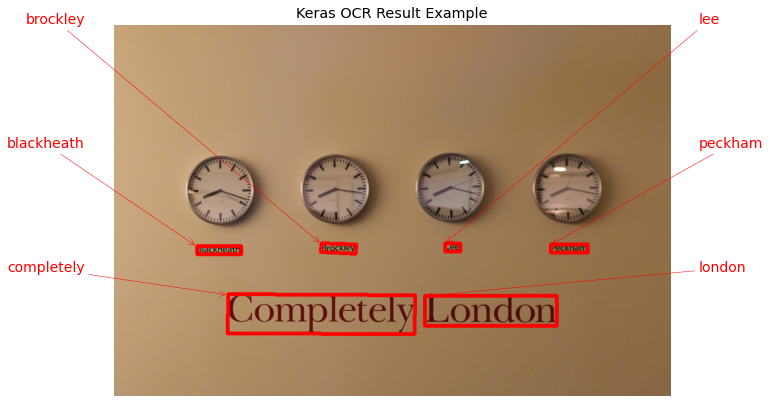

In [170]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[44]), results_base_keras[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

## Carotid US example

### easyocr

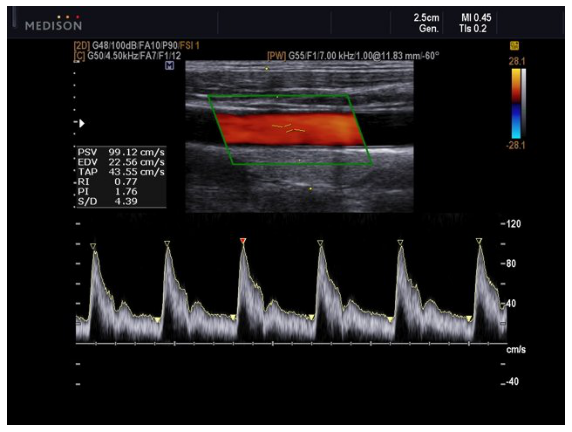

In [154]:
reader = easyocr.Reader(['en'], gpu = True)

img_filename = '../input/test-images/test1.jpg'

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(img_filename))
ax.axis('off')
plt.show()

In [96]:
results_easyocr = reader.readtext(img_filename)
easy_df = pd.DataFrame(results_easyocr, columns=['bbox','text','conf'])
# easy_df = easy_df[['bbox','text']]
easy_df

,bbox,text,conf
0,"[[465, 7], [499, 7], [499, 21], [465, 21]]",2Scm,0.726498
1,"[[519, 7], [559, 7], [559, 21], [519, 21]]",Mi0.45,0.538347
2,"[[17, 11], [89, 11], [89, 31], [17, 31]]",MEDISON,0.999968
3,"[[471, 19], [499, 19], [499, 33], [471, 33]]",Gen,0.596426
4,"[[517, 19], [553, 19], [553, 33], [517, 33]]",Tls 0.2,0.733204
5,"[[117, 37], [225, 37], [225, 53], [117, 53]]",'0OdB FAIO P9o FSI I,0.155342
6,"[[72, 36], [120, 36], [120, 68], [72, 68]]",Eogsoa,0.092472
7,"[[91, 49], [203, 49], [203, 65], [91, 65]]",G50 4 S0kHz FAT F1N2,0.175791
8,"[[297, 49], [499, 49], [499, 65], [297, 65]]","[PW G55F1ZOO kHz 1.00@11.83 mm-60""",0.271333
9,"[[573, 57], [597, 57], [597, 71], [573, 71]]","28,1",0.690662


### keras_ocr

In [94]:
!pip install keras-ocr -q
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [95]:
results_kerasocr = pipeline.recognize([img_filename])
keras_df = pd.DataFrame(results_kerasocr[0], columns=['text', 'bbox'])
keras_df

,text,bbox
0,256m,"[[465.0, 7.0], [497.0, 7.0], [497.0, 18.0], [4..."
1,mio45,"[[520.0, 7.0], [557.0, 7.0], [557.0, 18.0], [5..."
2,medison,"[[20.046234, 15.27197], [88.17921, 16.426767],..."
3,gen,"[[472.0, 20.0], [496.0, 20.0], [496.0, 31.0], ..."
4,tls,"[[518.0, 20.0], [536.0, 20.0], [536.0, 31.0], ..."
5,02,"[[534.0, 20.0], [552.0, 20.0], [552.0, 32.0], ..."
6,2di,"[[77.0, 39.0], [97.0, 39.0], [97.0, 51.0], [77..."
7,gasnoodbfaiopin,"[[97.0, 39.0], [199.0, 39.0], [199.0, 51.0], [..."
8,fsi,"[[196.0, 39.0], [216.0, 39.0], [216.0, 51.0], ..."
9,0,"[[213.0, 39.0], [222.0, 39.0], [222.0, 50.0], ..."


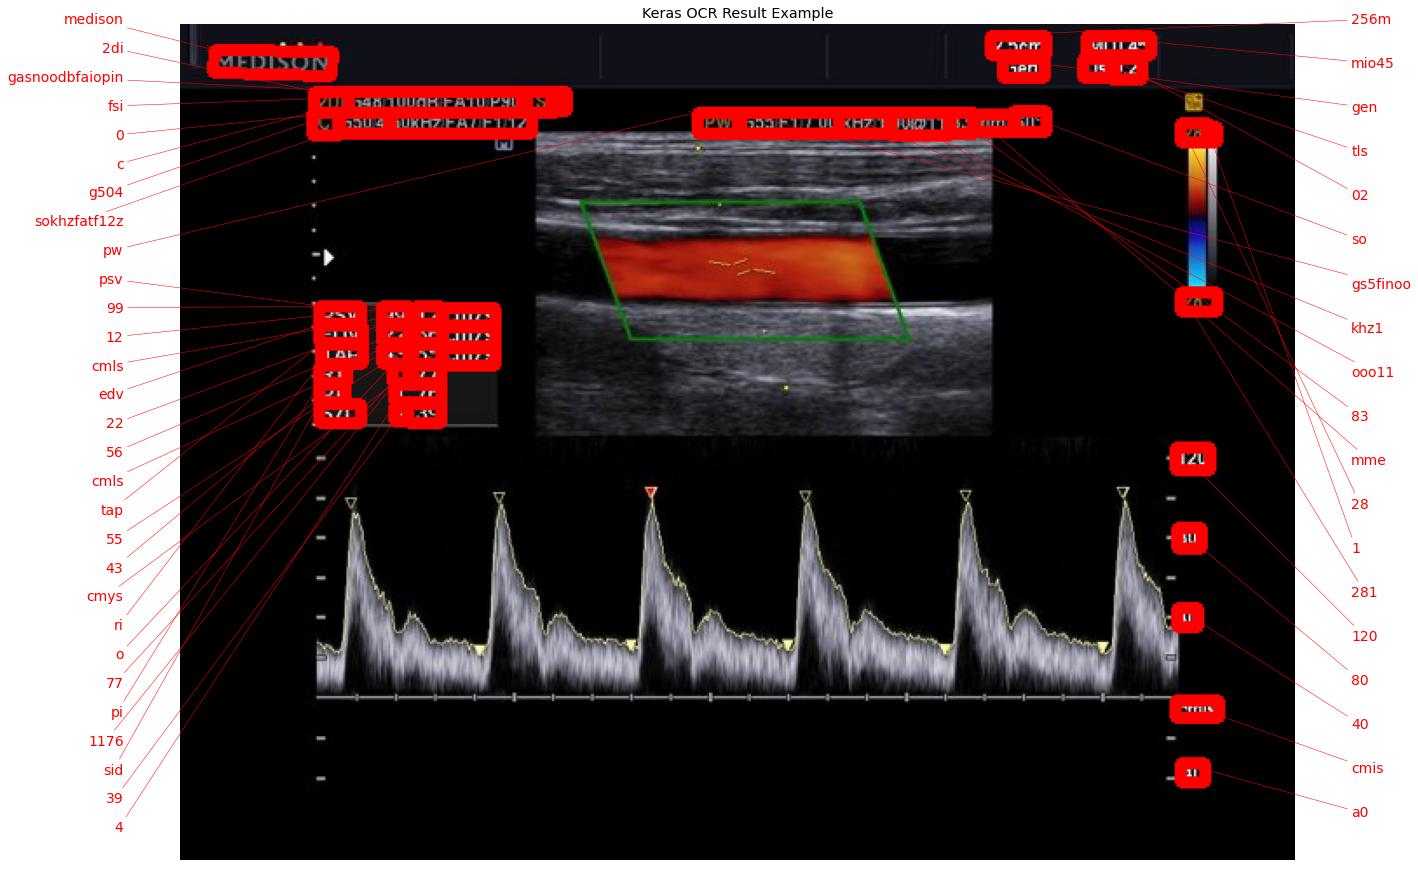

In [47]:
fig, ax = plt.subplots(figsize=(20, 30))
keras_ocr.tools.drawAnnotations(plt.imread(img_filename), results_kerasocr[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

### compare method's results

In [ ]:
# path test images
img_fns_test = glob('../input/test-images/*')

In [108]:
# easyocr
reader = easyocr.Reader(['en'], gpu = True)

dfs = []
for img in tqdm(img_fns_test[:]):
    result = reader.readtext(img)
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)

  0%|          | 0/2 [00:00<?, ?it/s]

In [110]:
# keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

dfs = []
for img in tqdm(img_fns_test[:]):
    results = pipeline.recognize([img])
    result = results[0]
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['text', 'bbox'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
kerasocr_df = pd.concat(dfs)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/2 [00:00<?, ?it/s]

In [145]:
def plot_compare(img_fns_test, easyocr_df, kerasocr_df):
    img_id = img_fns_test.split('/')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 2, figsize=(30, 40))

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fns_test), 
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    keras_results = kerasocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fns_test), 
                                    keras_results, ax=axs[1])
    axs[1].set_title('keras_ocr results', fontsize=24)
    plt.show()

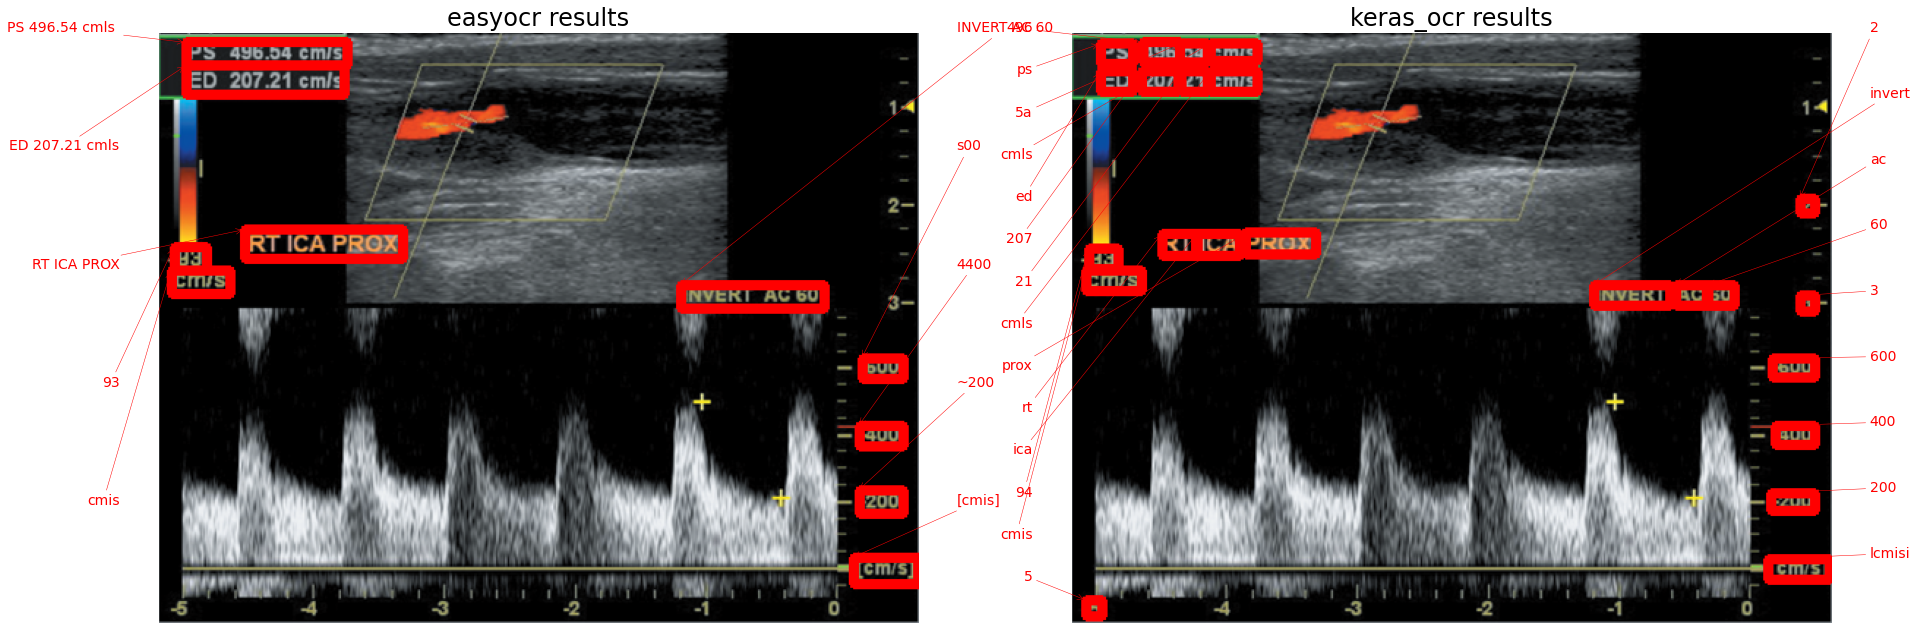

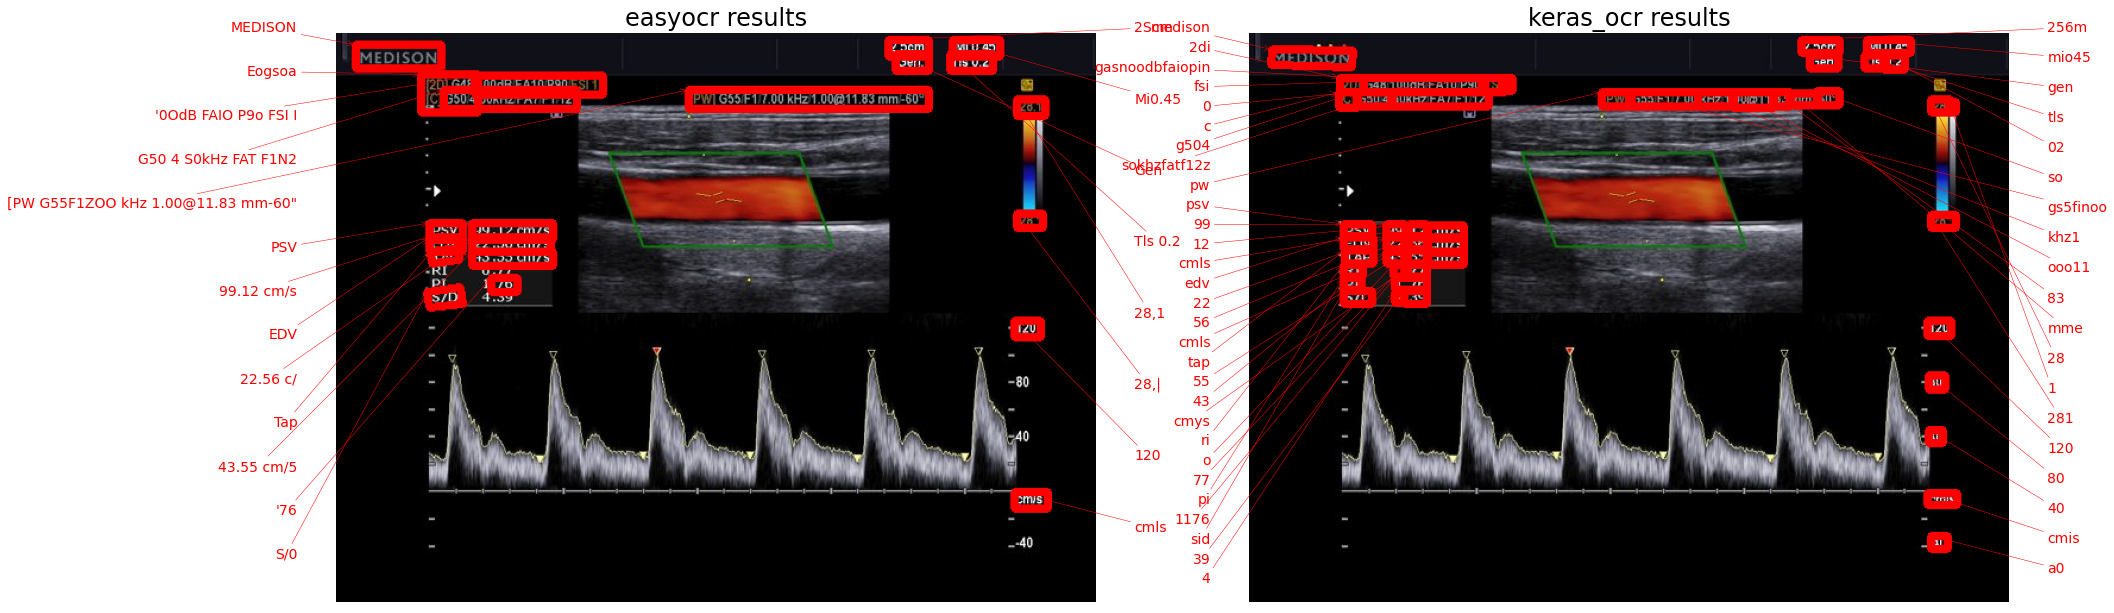

In [146]:
for img_fn in img_fns_test[:]:
    plot_compare(img_fn, easyocr_df, kerasocr_df)